In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial import procrustes
from scipy.spatial.distance import jensenshannon

In [3]:
plt.style.use('ggplot')

In [4]:
data=pd.read_csv('combined_data_with_loc.csv')
#load feature category mapping
feature_category_dict=json.load(open('feature_category_dict.json'))
data.head()

,Community Name,Region,Map reference,Grid reference,Location,Population Density,Travel time to GPO (minutes),Distance to GPO (km),LGA,Primary Care Partnership,...,Travel time to nearest public hospital with emergency department,Distance to nearest public hospital with emergency department,Presentations to emergency departments due to injury,"Presentations to emergency departments due to injury, %",Category 4 & 5 emergency department presentations,"Category 4 & 5 emergency department presentations, %",geo_lat,geo_lon,cart_x,cart_y
0,Ascot Vale,Northern and Western Metropolitan,4,B3,6km NW of Melbourne,3758.623596,9.360142,6.958742,Moonee Valley (C),Inner North West Primary Care Partnership,...,6.630953,4.993841,679.257076,20.502456,1864.918123,56.290032,-37.775606,144.914871,-4.242641,4.242641e+00
1,Braybrook,Northern and Western Metropolitan,4,A3,10km WNW of Melbourne,2025.468296,15.131666,11.595888,Maribyrnong (C),"HealthWest (b): Hobson's Bay, Maribyrnong, Wyn...",...,12.824977,10.161988,543.631989,20.647263,1683.966712,63.957428,-37.779315,144.858155,-9.238795,3.826834e+00
2,Craigieburn,Northern and Western Metropolitan,2,A3,27km N of Melbourne,1034.970870,31.994666,43.100287,Hume (C),Hume-Whittlesea Primary Care Partnership,...,11.570855,15.213189,2044.424399,20.618005,5102.134434,51.454988,-37.570576,144.963028,0.000000,2.700000e+01
3,Croydon,Eastern Metropolitan,2,B4,28km E of Melbourne,1730.064830,28.992647,34.071323,Maroondah (C),Outer East Primary Care Partnership,...,5.093285,3.601752,1754.954941,28.537825,3062.182462,49.795026,-37.813411,145.281013,28.000000,1.714506e-15
4,Fawkner,Northern and Western Metropolitan,4,C1,12km N of Melbourne,2619.120089,17.405267,13.047142,Moreland (C),Inner North West Primary Care Partnership,...,11.510757,12.004044,680.401318,17.909865,1942.874353,51.141315,-37.705724,144.963028,0.000000,1.200000e+01


In [6]:
# consider the socio demographic features
curr_feat_name='Socio-demographic'
curr_features=feature_category_dict[curr_feat_name]
curr_data=data[curr_features]
curr_data.head()

,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",Population in non-private dwellings,Public Housing Dwellings,% dwellings which are public housing,Dwellings with no motor vehicle,"Dwellings with no motor vehicle, %",Dwellings with no internet,...,2nd top industry - persons,"2nd top industry, %",3rd top industry - persons,"3rd top industry, %",Top occupation,"Top occupation, %",2nd top occupation - persons,"2nd top occupation, %",3rd top occupation - persons,"3rd top occupation, %"
0,5546,2.433105,5634,92.269898,72,1467,24.025549,825,13.511300,1062,...,Health Care and Social Assistance,12.028964,Education and Training,10.359096,Professionals,33.146233,Clerical and Administrative Workers,16.484490,Managers,15.051699
1,2994,2.734469,2908,93.806452,<5,1310,42.258065,507,16.354839,820,...,Retail Trade,11.814024,Health Care and Social Assistance,10.213415,Labourers,18.181818,Professionals,16.190834,Clerical and Administrative Workers,13.410969
2,11051,2.964257,10328,93.508375,5,384,3.476686,367,3.322770,1374,...,Retail Trade,10.746229,Health Care and Social Assistance,10.305700,Clerical and Administrative Workers,17.676869,Technicians and Trades Workers,17.450157,Machinery Operators and Drivers,12.475828
3,10020,2.350699,9694,92.996930,439,461,4.422487,716,6.868764,1941,...,Manufacturing,13.063750,Construction,11.153950,Professionals,20.873136,Technicians and Trades Workers,16.828855,Clerical and Administrative Workers,16.802071
4,4552,2.769112,4403,92.325435,262,151,3.166282,534,11.197316,1497,...,Retail Trade,11.680078,Health Care and Social Assistance,8.997805,Professionals,16.739659,Technicians and Trades Workers,15.936740,Clerical and Administrative Workers,14.136253


In [26]:
# consider only the numerical features of the socio demographic features
curr_data_num=curr_data.select_dtypes(include=[np.number])
curr_data_num.head()

,Number of Households,Average persons per household,Occupied private dwellings,"Occupied private dwellings, %",% dwellings which are public housing,"Dwellings with no motor vehicle, %",Dwellings with no internet,"Dwellings with no internet, %",Equivalent household income <$600/week,"Equivalent household income <$600/week, %",...,"Unpaid carer to person with disability, persons","Unpaid carer to person with disability, %","Unpaid carer of children, persons","Unpaid carer of children, %","Top industry, %","2nd top industry, %","3rd top industry, %","Top occupation, %","2nd top occupation, %","3rd top occupation, %"
0,5546,2.433105,5634,92.269898,24.025549,13.511300,1062,17.392728,1604,33.782645,...,1121,11.119929,2735,26.895467,13.122506,12.028964,10.359096,33.146233,16.484490,15.051699
1,2994,2.734469,2908,93.806452,42.258065,16.354839,820,26.451613,1431,61.469072,...,574,10.338617,1436,25.357584,15.891768,11.814024,10.213415,18.181818,16.190834,13.410969
2,11051,2.964257,10328,93.508375,3.476686,3.322770,1374,12.440018,3257,35.969078,...,2474,10.929010,8187,35.815215,18.128421,10.746229,10.305700,17.676869,17.450157,12.475828
3,10020,2.350699,9694,92.996930,4.422487,6.868764,1941,18.620491,3287,38.341304,...,2220,12.183075,5361,29.183451,13.153412,13.063750,11.153950,20.873136,16.828855,16.802071
4,4552,2.769112,4403,92.325435,3.166282,11.197316,1497,31.390229,2230,58.932347,...,1249,13.853150,2243,24.615891,13.679590,11.680078,8.997805,16.739659,15.936740,14.136253


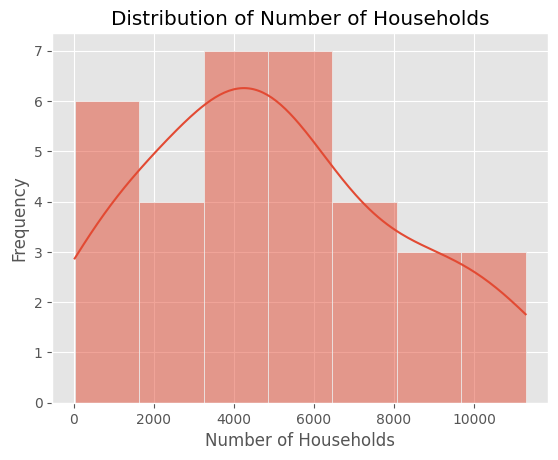

In [7]:
sns.histplot(curr_data['Number of Households'], kde=True)
plt.title('Distribution of Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Frequency')
plt.show()

Spearman correlation between straight line distance from GPO and number of households: -0.18851774204331767


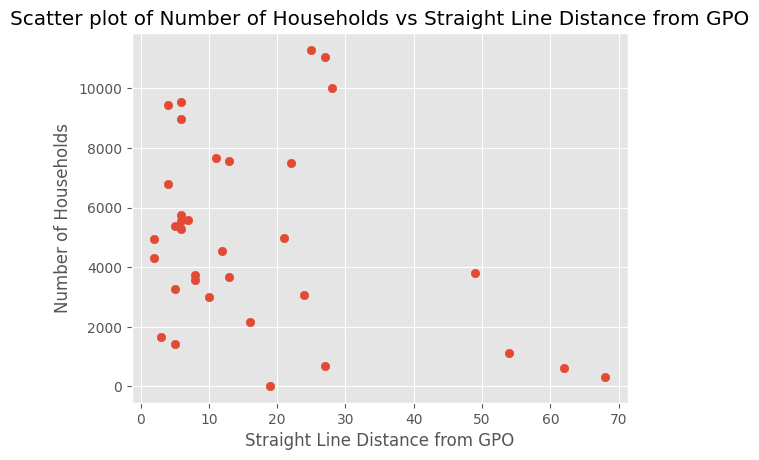

In [13]:
straight_line_dist_gpo=np.sqrt(data['cart_x']**2+data['cart_y']**2)

# find correlation between straight line distance from GPO and number of households
# use spearman correlation from scipy
from scipy.stats import spearmanr
corr=spearmanr(straight_line_dist_gpo, curr_data['Number of Households'])
print('Spearman correlation between straight line distance from GPO and number of households:', corr.correlation)

# do plot
plt.scatter(straight_line_dist_gpo, curr_data['Number of Households'])
plt.xlabel('Straight Line Distance from GPO')
plt.ylabel('Number of Households')

plt.title('Scatter plot of Number of Households vs Straight Line Distance from GPO')
plt.show()

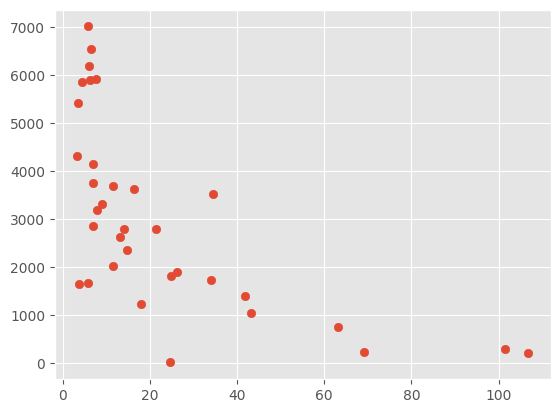

In [15]:
plt.scatter(data['Distance to GPO (km)'], data['Population Density'])

In [32]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Population Density'])
moran_pop_density = Moran(data['Population Density'], w)
print("Moran's I for population density:", moran_pop_density.I)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[curr_data_num.columns[:4]].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
print(model.summary)


Moran's I for population density: 0.47575231846242483
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           6
S.D. dependent var  :     26.3343                Degrees of Freedom    :          28
Pseudo R-squared    :      0.9022
Spatial Pseudo R-squared:  0.7904
Log likelihood      :   -123.8211
Sigma-square ML     :     70.1248                Akaike info criterion :     259.642
S.E of regression   :      8.3741                Schwarz criterion     :     268.800

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-

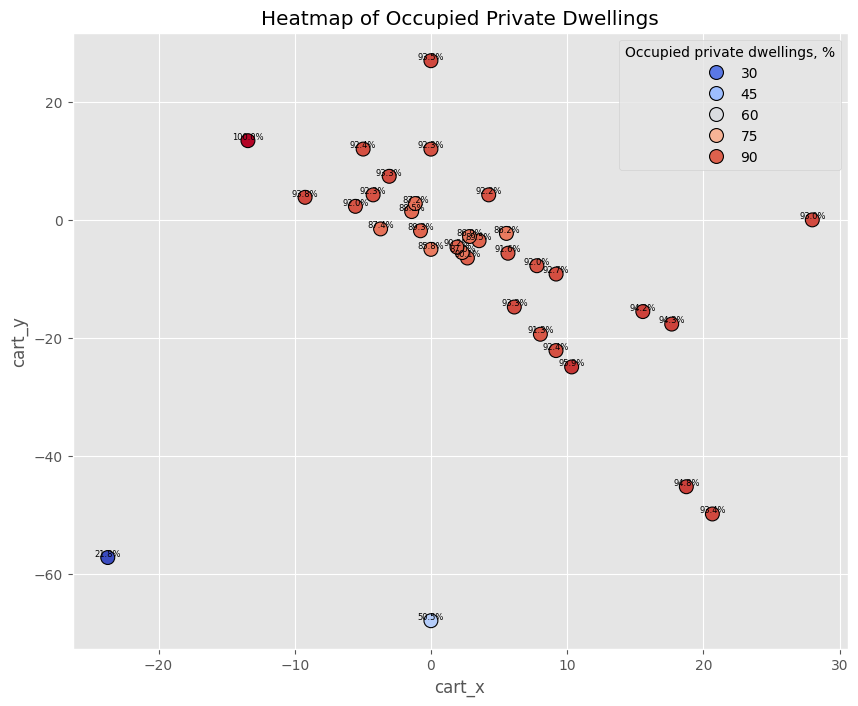

In [40]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Occupied private dwellings, %', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Occupied private dwellings, %'].iloc[i]:.1f}%", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [46]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag
from sklearn.model_selection import LeaveOneOut

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
# Create LeaveOneOut object
loo = LeaveOneOut()

# Initialize lists to store results
moran_I_values = []
model_summaries = []

# Perform leave-one-out cross-validation
for train_index, test_index in loo.split(data_gpd):
	# Split the data
	train_data = data_gpd.iloc[train_index]
	test_data = data_gpd.iloc[test_index]

	# Create spatial weights matrix using k-nearest neighbors for training data
	w_train = weights.KNN.from_dataframe(train_data, k=8)
	w_train.transform = 'R'  # Use uppercase 'R' for row standardization

	# Continue with Moran's I and the SAR model for training data
	lag_pop_density_train = weights.lag_spatial(w_train, train_data['Population Density'])
	moran_pop_density_train = Moran(train_data['Population Density'], w_train)
	moran_I_values.append(moran_pop_density_train.I)

	# Define dependent and independent variables for training data
	y_train = train_data['Distance to GPO (km)'].values.reshape(-1, 1)
	X_train = train_data[curr_data_num.columns[:4]].values

	# Fit a spatial lag model (ML_Lag) for training data
	model_train = ML_Lag(y_train, X_train, w=w_train, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
	model_summaries.append(model_train.summary)

# Print results
print("Moran's I values for each leave-one-out iteration:", moran_I_values)
print("Model summaries for each leave-one-out iteration:", model_summaries)

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Population Density'])
moran_pop_density = Moran(data['Population Density'], w)
print("Moran's I for population density:", moran_pop_density.I)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[curr_data_num.columns[:4]].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=curr_data_num.columns[:4].tolist())
print(model.summary)


Moran's I values for each leave-one-out iteration: [np.float64(0.49081814767574966), np.float64(0.4758371853182749), np.float64(0.4721365509860188), np.float64(0.48211496685537597), np.float64(0.47598244845497223), np.float64(0.4805223015021558), np.float64(0.4777586217286639), np.float64(0.46519100083737164), np.float64(0.44721164210177233), np.float64(0.4862604848497211), np.float64(0.4533262421517186), np.float64(0.45178117376227606), np.float64(0.43851300691548784), np.float64(0.45857231704874535), np.float64(0.47376382392764926), np.float64(0.513402722015654), np.float64(0.47722415231396753), np.float64(0.4955425180565708), np.float64(0.488683854563157), np.float64(0.5084578298745055), np.float64(0.4153104450190932), np.float64(0.43939757649516387), np.float64(0.45881511334137914), np.float64(0.44769018967919244), np.float64(0.4102880736967222), np.float64(0.43877546541968737), np.float64(0.4292183096560456), np.float64(0.4276313182044245), np.float64(0.4195865347645906), np.float

In [53]:
print("\n".join(model_summaries))

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          33
Mean dependent var  :     23.4569                Number of Variables   :           6
S.D. dependent var  :     26.5878                Degrees of Freedom    :          27
Pseudo R-squared    :      0.9003
Spatial Pseudo R-squared:  0.8120
Log likelihood      :   -120.7514
Sigma-square ML     :     72.8621                Akaike info criterion :     253.503
S.E of regression   :      8.5359                Schwarz criterion     :     262.482

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-------------------------------------------------------

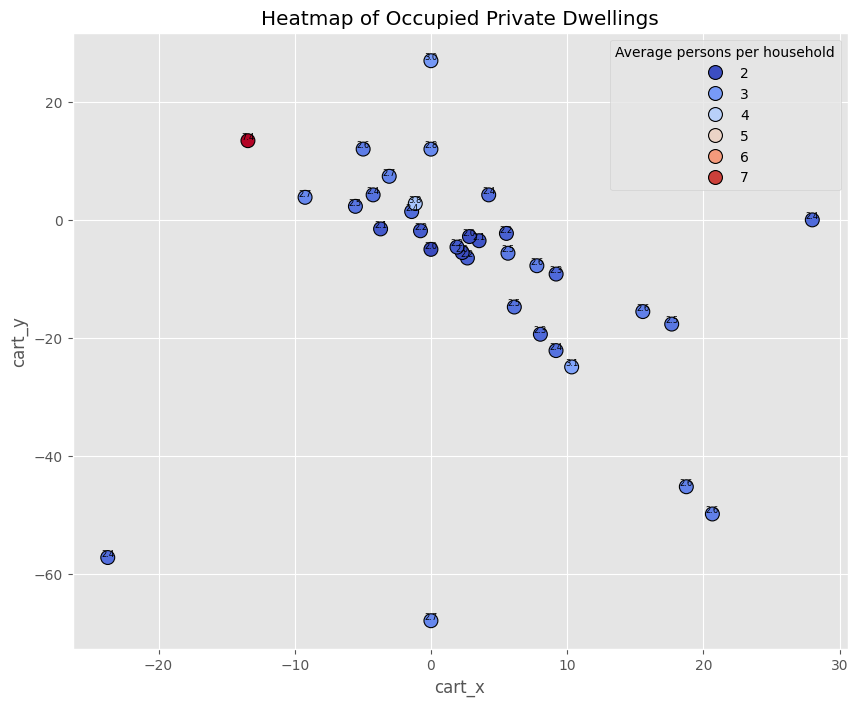

In [55]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Average persons per household', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Average persons per household'].iloc[i]:.1f}", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [63]:
import geopandas as gpd
from shapely.geometry import Point
from esda import Moran
from pysal.lib import weights
from pysal.model.spreg import ML_Lag

# Assuming 'data' has 'Latitude' and 'Longitude' columns to define location
# Replace these with the actual names of your coordinate columns if they differ
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['IRSD (min)'])
moran_pop_density = Moran(data['Distance to GPO (km)'], w)
print("Moran's I for IRSD (min):", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['IRSD (min)', 'IRSD (avg)', 'IRSD (max)']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['IRSD (min)', 'IRSD (avg)', 'IRSD (max)'])
print(model.summary)


Moran's I for IRSD (min): 0.4322190188078227
p-value: 0.001
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           5
S.D. dependent var  :     26.3343                Degrees of Freedom    :          29
Pseudo R-squared    :      0.7834
Spatial Pseudo R-squared:  0.6129
Log likelihood      :   -140.6109
Sigma-square ML     :    190.3946                Akaike info criterion :     291.222
S.E of regression   :     13.7984                Schwarz criterion     :     298.854

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probabi

In [72]:
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Equivalent household income <$600/week, %'])
moran_pop_density = Moran(data['Equivalent household income <$600/week, %'], w, permutations=9999)
print("Moran's I for Equivalent household income <$600/week, %:", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['Equivalent household income <$600/week, %']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['Equivalent household income <$600/week, %'])
print(model.summary)


Moran's I for Equivalent household income <$600/week, %: 0.3144429431908387
p-value: 0.0002
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           3
S.D. dependent var  :     26.3343                Degrees of Freedom    :          31
Pseudo R-squared    :      0.8255
Spatial Pseudo R-squared:  0.0439
Log likelihood      :   -144.8534
Sigma-square ML     :    244.4849                Akaike info criterion :     295.707
S.E of regression   :     15.6360                Schwarz criterion     :     300.286

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.E

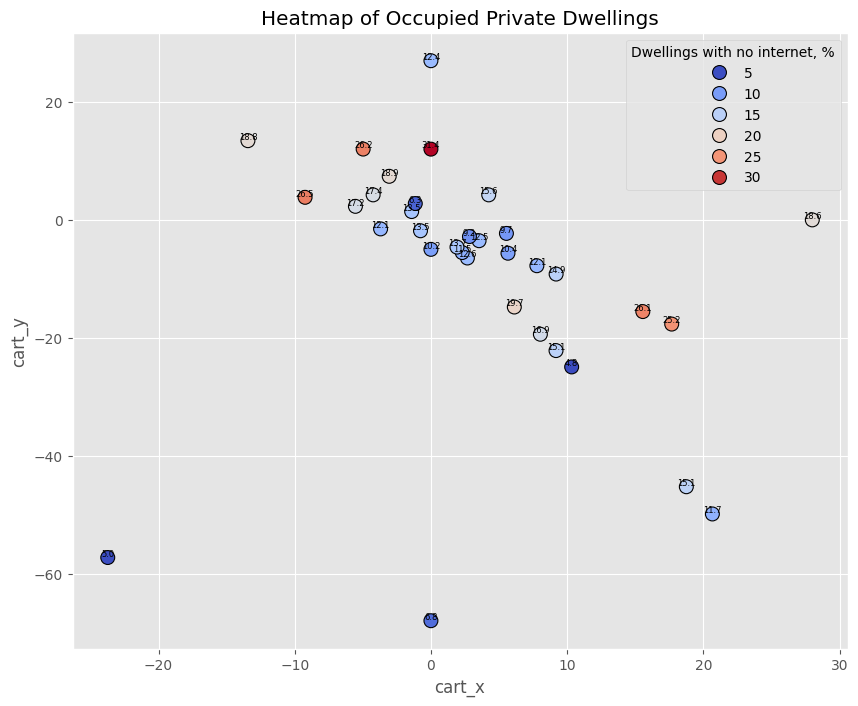

In [68]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='cart_x', y='cart_y', hue='Dwellings with no internet, %', data=data, palette='coolwarm', s=100, edgecolor='k')

# Annotate each point with the percentage
for i in range(data.shape[0]):
	plt.annotate(f"{data['Dwellings with no internet, %'].iloc[i]:.1f}", 
				 (data['cart_x'].iloc[i], data['cart_y'].iloc[i]), 
				 textcoords="offset points", 
				 xytext=(0,1), 
				 ha='center', fontsize=6)

plt.title('Heatmap of Occupied Private Dwellings')
plt.xlabel('cart_x')
plt.ylabel('cart_y')
plt.show()

In [74]:
curr_feat_name='Hospital'
curr_features=feature_category_dict[curr_feat_name]
curr_data=data[curr_features]

In [75]:
data_gpd = data.copy()  # Create a copy of the original DataFrame
data_gpd['geometry'] = data_gpd.apply(lambda row: Point(row['cart_x'], row['cart_y']), axis=1)
data_gpd = gpd.GeoDataFrame(data_gpd, geometry='geometry')

# Create spatial weights matrix using k-nearest neighbors
w = weights.KNN.from_dataframe(data_gpd, k=8)
w.transform = 'R'  # Use uppercase 'R' for row standardization

# Continue with Moran's I and the SAR model
lag_pop_density = weights.lag_spatial(w, data['Presentations to emergency departments due to injury, %'])
moran_pop_density = Moran(data['Presentations to emergency departments due to injury, %'], w, permutations=9999)
print("Moran's I for Presentations to emergency departments due to injury, %:", moran_pop_density.I)
# print p-value
print("p-value:", moran_pop_density.p_sim)

# Define dependent and independent variables
y = data['Distance to GPO (km)'].values.reshape(-1, 1)
X = data[['Presentations to emergency departments due to injury, %','Category 4 & 5 emergency department presentations, %']].values

# Fit a spatial lag model (ML_Lag)
model = ML_Lag(y, X, w=w, name_y='Distance to GPO (km)', name_x=['Presentations to emergency departments due to injury, %','Category 4 & 5 emergency department presentations, %'])
print(model.summary)


Moran's I for Presentations to emergency departments due to injury, %: 0.5832636049850872
p-value: 0.0001
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :Distance to GPO (km)                Number of Observations:          34
Mean dependent var  :     22.9717                Number of Variables   :           4
S.D. dependent var  :     26.3343                Degrees of Freedom    :          30
Pseudo R-squared    :      0.7939
Spatial Pseudo R-squared:  0.7705
Log likelihood      :   -134.8289
Sigma-square ML     :    142.4311                Akaike info criterion :     277.658
S.E of regression   :     11.9345                Schwarz criterion     :     283.763

------------------------------------------------------------------------------------
            Variable     Coefficie